# Decision Trees

*Decision trees are an ML method applicable to classifiication or regression tasks.For prediciting the dependent variable of a certain instance, one has to navigate through the decision tree.*

*It is a __nonparametric model__, which means, that the number of parameters is not determined prior to training. A linear model is a __parametric model__. Therefore, decisions trees can easily __overfit__!*

*Important is the maximal depth of the tree, which is an indicator of tree complexity.*

*picture from: Barros, Rodgrido C., et al. "Automatic Design of Decision Tree"*

![From Barros, Rodgrido C., et al. "Automatic Design of Design Tree](tree_for_classification.png)

# Preamble

*We again strongly follow __Hands-On Machine Learning with Scikit-Learn, TensorFlow and Keras (by Aurelien Geron)__.*

In [1]:
# Common imports
import numpy as np # numpy is THE toolbox for scientific computing with python
import pandas as pd # pandas provides THE data structure and data analysis tools for data scientists 

# maximum number of columns
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from warnings import filterwarnings
filterwarnings('ignore')

# Train a Decision Tree

Let us start with using the iris datasets (as in our SVC example two weeks ago).

In [31]:
from sklearn import datasets

df_iris         = pd.DataFrame(datasets.load_iris().data)
df_iris.columns = datasets.load_iris().feature_names
y_iris          = datasets.load_iris().target
# bring target variable into dataframe:
df_iris.insert(df_iris.shape[1], 'target', y_iris, True)

df_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [32]:
df_iris.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [33]:
cols = ['petal length (cm)', 'petal width (cm)']
# design matrix = features
X = np.array(df_iris[cols].copy())
y = np.array(df_iris['target'])

# X_train, y_train...

In [34]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Parameters
    ----------
    criterion : {"gini", "entropy"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "entropy" for the information gain.
    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.
    max_depth : int, default=None
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.
    min_samples_split : int or float, default=2
        The minimum number of samples required to split an internal node:
        - If int, then consider `min_samples_split` as the minimum number.
        - If float, then `min_samples_split` is a fraction and
          `ceil(min_samples_split * n_samples)` are the minimum
          number of samples for each split.
        .. versionchanged:: 0.18
           Added float values for fractions.
    min_samples_leaf : int or float, default=1
        The minimum number of samples required to be at a leaf node.
        A split point at any depth will only be considered if it leaves at
        least ``min_samples_leaf`` training samples in each of the left and
        right branches.  This may have the effect of smoothing the model,
        especially in regression.
        - If int, then consider `min_samples_leaf` as the minimum number.
        - If float, then `min_samples_leaf` is a fraction and
          `ceil(min_samples_leaf * n_samples)` are the minimum
          number of samples for each node.
        .. versionchanged:: 0.18
           Added float values for fractions.
    min_weight_fraction_leaf : float, default=0.0
        The minimum weighted fraction of the sum total of weights (of all
        the input samples) required to be at a leaf node. Samples have
        equal weight when sample_weight is not provided.
    max_features : int, float or {"auto", "sqrt", "log2"}, default=None
        The number of features to consider when looking for the best split:
            - If int, then consider `max_features` features at each split.
            - If float, then `max_features` is a fraction and
              `int(max_features * n_features)` features are considered at each
              split.
            - If "auto", then `max_features=sqrt(n_features)`.
            - If "sqrt", then `max_features=sqrt(n_features)`.
            - If "log2", then `max_features=log2(n_features)`.
            - If None, then `max_features=n_features`.
        Note: the search for a split does not stop until at least one
        valid partition of the node samples is found, even if it requires to
        effectively inspect more than ``max_features`` features.
    random_state : int, RandomState instance, default=None
        Controls the randomness of the estimator. The features are always
        randomly permuted at each split, even if ``splitter`` is set to
        ``"best"``. When ``max_features < n_features``, the algorithm will
        select ``max_features`` at random at each split before finding the best
        split among them. But the best found split may vary across different
        runs, even if ``max_features=n_features``. That is the case, if the
        improvement of the criterion is identical for several splits and one
        split has to be selected at random. To obtain a deterministic behaviour
        during fitting, ``random_state`` has to be fixed to an integer.
        See :term:`Glossary <random_state>` for details.
    max_leaf_nodes : int, default=None
        Grow a tree with ``max_leaf_nodes`` in best-first fashion.
        Best nodes are defined as relative reduction in impurity.
        If None then unlimited number of leaf nodes.
    min_impurity_decrease : float, default=0.0
        A node will be split if this split induces a decrease of the impurity
        greater than or equal to this value.
        The weighted impurity decrease equation is the following::
            N_t / N * (impurity - N_t_R / N_t * right_impurity
                                - N_t_L / N_t * left_impurity)
        where ``N`` is the total number of samples, ``N_t`` is the number of
        samples at the current node, ``N_t_L`` is the number of samples in the
        left child, and ``N_t_R`` is the number of samples in the right child.
        ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
        if ``sample_weight`` is passed.
        .. versionadded:: 0.19
    min_impurity_split : float, default=0
        Threshold for early stopping in tree growth. A node will split
        if its impurity is above the threshold, otherwise it is a leaf.
        .. deprecated:: 0.19
           ``min_impurity_split`` has been deprecated in favor of
           ``min_impurity_decrease`` in 0.19. The default value of
           ``min_impurity_split`` has changed from 1e-7 to 0 in 0.23 and it
           will be removed in 0.25. Use ``min_impurity_decrease`` instead.
    class_weight : dict, list of dict or "balanced", default=None
        Weights associated with classes in the form ``{class_label: weight}``.
        If None, all classes are supposed to have weight one. For
        multi-output problems, a list of dicts can be provided in the same
        order as the columns of y.
        Note that for multioutput (including multilabel) weights should be
        defined for each class of every column in its own dict. For example,
        for four-class multilabel classification weights should be
        [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of
        [{1:1}, {2:5}, {3:1}, {4:1}].
        The "balanced" mode uses the values of y to automatically adjust
        weights inversely proportional to class frequencies in the input data
        as ``n_samples / (n_classes * np.bincount(y))``
        For multi-output, the weights of each column of y will be multiplied.
        Note that these weights will be multiplied with sample_weight (passed
        through the fit method) if sample_weight is specified.
    presort : deprecated, default='deprecated'
        This parameter is deprecated and will be removed in v0.24.
        .. deprecated:: 0.22
    ccp_alpha : non-negative float, default=0.0
        Complexity parameter used for Minimal Cost-Complexity Pruning. The
        subtree with the largest cost complexity that is smaller than
        ``ccp_alpha`` will be chosen. By default, no pruning is performed. See
        :ref:`minimal_cost_complexity_pruning` for details.
        .. versionadded:: 0.22

# Making a prediction

*Gini impurity:*

$$ G_I = 1- \sum_{k = 1}^{n} p_{i,k}^2 $$
 with $p_{i,k}$ ratio of class $k$ instances in the i^th node.

*Entropy:*

$$ H_i = - \sum_{k=1}^{n} p_{i,k} \log_2\left( p_{i,k} \right) $$##

Entropy tends to prduce slightly more balanced trees.

In [35]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [36]:
tree_clf.predict([[5, 1.5]])

array([1])

In [37]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

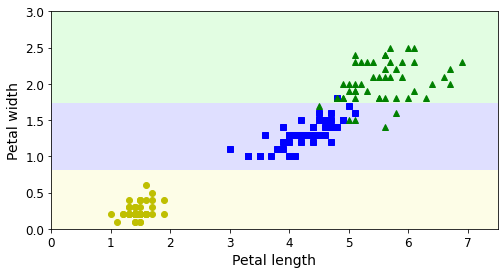

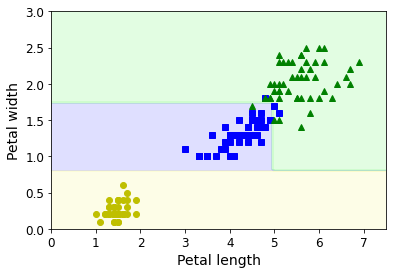

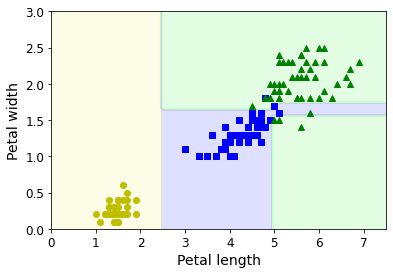

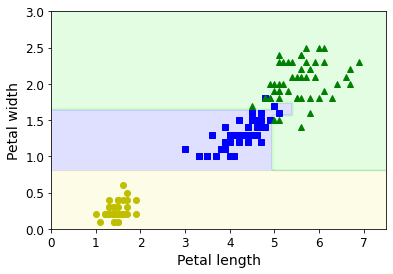

In [38]:
plt.figure(figsize=(8, 4))

for i in range(4):
    tree_clf = DecisionTreeClassifier(max_depth = 2+i, criterion = 'entropy')
    # ax_depth = 2, 3,4...
    tree_clf.fit(X, y)
    plot_decision_boundary(tree_clf, X, y)
    plt.show()

# Regularization Hyperparameters

*A good regularization is always to restrict the max_depth parameter.*

*Another interesting parameters are 
* __min_samples_split__ (minimum number off samples a node mmust have before it can split), 
* __min_samples_leaf__(minimum number of samples a leaf node must have), 
* __max_leaf_nodes__ and 
* __max_features__ (maximum number of features that are evaluated for splitting at each node).*

Let us use the moon dataset:

In [39]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

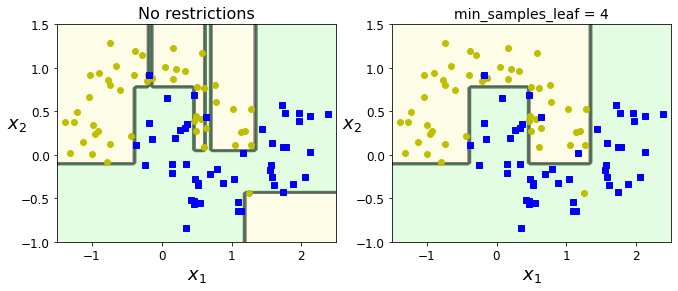

In [40]:
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

# Decision Trees for Regression

*picture from __Hands-On Machine Learning with Scikit-Learn, TensorFlow and Keras (by Aurelien Geron)__*

![title](regression_tree.png)

In [41]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
print(y[:10])

[[-0.00504175]
 [ 0.83579891]
 [ 0.244592  ]
 [-0.03250116]
 [ 0.65987015]
 [ 0.52074237]
 [ 0.66203003]
 [ 0.60199524]
 [-0.05657118]
 [ 0.25188525]]


In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
export_graphviz()
__graphviz__

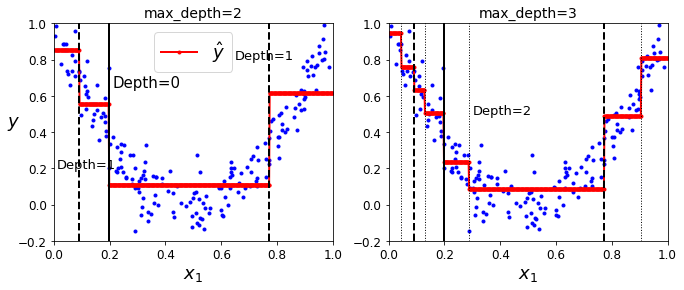

In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

*Decision trees are prone to overfitting when dealing with regression tasks.*

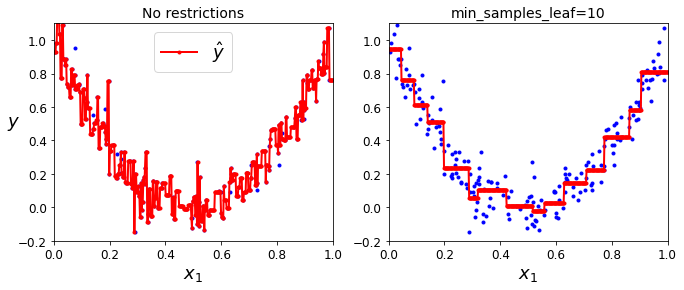

In [44]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

*Random Forests can limit the instability of decision trees by averaging predictions over many trees.*

# Ensemble Methods and Random Forests

*An ensemble of decision trees is a random forest. This is one of the most pwerful machine learning algorithms available today.*

*We now look at ensebmle methods like bagging, boosting and stacking.*

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Voting Classifier

*Now we make an interesting observation. The prediction of many independent algoriths together give a better prediction than the individual classifiers themselves.*

*  Hard voting: Majority voting
*  Soft voting: More weight to highly confident votes

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

# # predict: logistic: 0.95 -> 1
#            random  : 0.6  -> 0
#            SVC     :       -> 1

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [47]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [48]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


For soft voting the SVC has to allow for probability estimation:

In [49]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [50]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

# kaggle-competitions
# netflix 

# orthogonal 

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


Soft voting leads to 91.2% of accuracy!

# Bagging and Pasting

In [ ]:
weak learners -> strong learner

*Instead of taking different algorithms, we now use the same training algorithm but train them on different random subsets of the training data.*

* Bagging: sampling with replacement
* Pasting: sampling without replacement

data set: 1,2,3...100

bagging: 1,2,2,3,10,10,12,70,70...
pasting: 1,2,3,10,12,70

In [51]:
from sklearn.ensemble import BaggingClassifier
# base classifier:
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), 
    n_estimators=50,
    max_samples=100, 
    bootstrap=True, 
    n_jobs=-1,  
    random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

Parameters
    ----------
    base_estimator : object, default=None
        The base estimator to fit on random subsets of the dataset.
        If None, then the base estimator is a decision tree.
    n_estimators : int, default=10
        The number of base estimators in the ensemble.
    max_samples : int or float, default=1.0
        The number of samples to draw from X to train each base estimator (with
        replacement by default, see `bootstrap` for more details).
        - If int, then draw `max_samples` samples.
        - If float, then draw `max_samples * X.shape[0]` samples.
    max_features : int or float, default=1.0
        The number of features to draw from X to train each base estimator (
        without replacement by default, see `bootstrap_features` for more
        details).
        - If int, then draw `max_features` features.
        - If float, then draw `max_features * X.shape[1]` features.
    bootstrap : bool, default=True
        Whether samples are drawn with replacement. If False, sampling
        without replacement is performed.
    bootstrap_features : bool, default=False
        Whether features are drawn with replacement.
    oob_score : bool, default=False
        Whether to use out-of-bag samples to estimate
        the generalization error.
    warm_start : bool, default=False
        When set to True, reuse the solution of the previous call to fit
        and add more estimators to the ensemble, otherwise, just fit
        a whole new ensemble. See :term:`the Glossary <warm_start>`.
        .. versionadded:: 0.17
           *warm_start* constructor parameter.
    n_jobs : int, default=None
        The number of jobs to run in parallel for both :meth:`fit` and
        :meth:`predict`. ``None`` means 1 unless in a
        :obj:`joblib.parallel_backend` context. ``-1`` means using all
        processors. See :term:`Glossary <n_jobs>` for more details.
    random_state : int or RandomState, default=None
        Controls the random resampling of the original dataset
        (sample wise and feature wise).
        If the base estimator accepts a `random_state` attribute, a different
        seed is generated for each instance in the ensemble.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.
    verbose : int, default=0
        Controls the verbosity when fitting and predicting.


In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


Let us compare it with one decision tree:

In [53]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [54]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

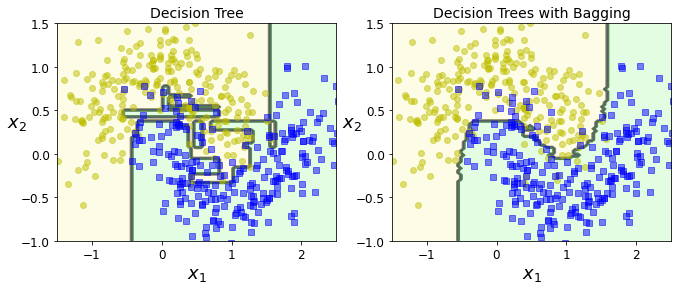

In [55]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

*The ensemble has a comparable bias but a smaller variance. The decision boundary is less irregular*

**Out-of-bag score:**

In [ ]:
Take as validation set all data known not used for training (out-of bag datapoints)

In [56]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

In [57]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

# Random Forests

*A random forest is an ensemble of Decision Trees generally trained via the bagging methods.*

In [58]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, 
                                 max_leaf_nodes=16, 
                                 n_jobs=-1, 
                                 random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.912


In [ ]:
gradient boosting, Ada Boost, Xgboost, extra-trees

Extra-Trees: for spltting the algorithm searches for the best possible threshold for each feature at every node. Extra-Tres use random thresholds for each feature rather than searching for the best possible thresholds.

# Feature Importance

In [ ]:
logistic regress: coeff -> weight

*A great quality of random forests is that it is very easy to measure the relative importance of each feature-*

In [59]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10309761228768258
sepal width (cm) 0.0261007361046454
petal length (cm) 0.4336527400683616
petal width (cm) 0.4371489115393104


Random Forests are very handy to get a quick understanding of what features
actually matter, in particular if you need to perform feature selection.